In [1]:
# General libraries
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")

# Neural network libraries
from keras import optimizers
from keras.models import Sequential
from keras.layers import Dense, Dropout,BatchNormalization
from keras.callbacks import EarlyStopping
from tensorflow import keras

# Machine Learning libraries
from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

#Visualization
from matplotlib import pyplot
import matplotlib.pyplot as plt

In [2]:
#print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))
#config = tf.compat.v1.ConfigProto(device_count = {'GPU': 1})

## Preliminary work on the dataset

In [3]:
yahoo_df = pd.read_csv("../data/OIL.csv")
#yahoo_df = yahoo_df.set_index("Date")
yahoo_df = yahoo_df.set_index("Date")


X = yahoo_df[['ROC_1', 'ROC_4', 'ROC_7', 'Momentum', '1 Day ROI', '3 Day ROI',
       '5 Day ROI', '20 Day ROI', '6_day_RSI', 'MACD_12_26', 'SRSI_30',
       'Williams_1', 'Williams_3', 'Williams_14', 'ATR_14', 'CCI']]

# Train, test, val

In [4]:

X = yahoo_df[['ROC_1', 'ROC_4', 'ROC_5', 'ROC_30', 'Return', '2 Day ROI', '3 Day ROI',
       '4 Day ROI', '30 Day ROI', 'RSI_1', 'RSI_2', 'RSI_3', 'RSI_4',
       'MACDs_12_26_9', 'SRSI_14', 'SRSI_30', 'CCI', 'Previous_differenced',
       'principalDf']]
y = yahoo_df["Up down"]

In [5]:
sum(y)/len(X)

0.5193665331043694

In [6]:
# Split in 80/20 the dataframe
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size = 0.20, shuffle=False)

# Normalize

In [7]:
def normalize(df):
    #df = data
    for column in df:
        df[column]=((df[column]-df[column].mean())/df[column].std())
    return df

In [8]:
X_train = normalize(X_train)
X_test = normalize(X_test)


# Model ANN


In [9]:
# Set early stopping monitor so the model stops training when it won't improve anymore
esm = EarlyStopping(monitor = 'val_binary_accuracy',patience=50)

# Set the optimizer
opt = keras.optimizers.SGD(learning_rate = 0.0001)

In [10]:
metrics=[keras.metrics.Accuracy(),
    keras.metrics.BinaryAccuracy(name="binary_accuracy", dtype=None, threshold=0.49),
    keras.metrics.MeanSquaredError(name='my_mse'),
    keras.metrics.BinaryCrossentropy(),
    keras.metrics.Hinge()]

In [11]:
classifier = Sequential()
classifier.add(Dense(256,  activation = 'relu'))
classifier.add(Dropout(0.4))
classifier.add(Dense(128,  activation = 'relu'))
classifier.add(Dropout(0.4))
classifier.add(Dense(64,  activation = 'relu'))
classifier.add(Dense(32,  activation = 'relu'))
classifier.add(Dense(16,  activation = 'relu'))
classifier.add(Dense(8,  activation = 'relu'))
# Adding the output layer
classifier.add(Dense(1,  activation = 'relu'))

# Compiling the ANN
classifier.compile(optimizer = opt, loss = "binary_crossentropy", metrics = metrics)

# Fitting the ANN to the Training set
classifier.fit(X_train, y_train, batch_size = 50, epochs = 1000, validation_split = 0.10, callbacks = [esm],shuffle=False)

Epoch 1/1000
76/76 [==============================] - 24s 146ms/step - loss: 1.1533 - accuracy: 7.9533e-04 - binary_accuracy: 0.4878 - my_mse: 0.3894 - binary_crossentropy: 1.1533 - hinge: 0.9978 - val_loss: 1.1722 - val_accuracy: 0.0000e+00 - val_binary_accuracy: 0.4548 - val_my_mse: 0.4147 - val_binary_crossentropy: 1.1722 - val_hinge: 0.9873
Epoch 2/1000
76/76 [==============================] - 5s 65ms/step - loss: 0.9756 - accuracy: 0.0000e+00 - binary_accuracy: 0.4859 - my_mse: 0.3530 - binary_crossentropy: 0.9756 - hinge: 0.9971 - val_loss: 1.0341 - val_accuracy: 0.0000e+00 - val_binary_accuracy: 0.4548 - val_my_mse: 0.3806 - val_binary_crossentropy: 1.0341 - val_hinge: 0.9834
Epoch 3/1000
76/76 [==============================] - 3s 37ms/step - loss: 0.9151 - accuracy: 0.0000e+00 - binary_accuracy: 0.4889 - my_mse: 0.3324 - binary_crossentropy: 0.9151 - hinge: 0.9965 - val_loss: 0.9583 - val_accuracy: 0.0000e+00 - val_binary_accuracy: 0.4548 - val_my_mse: 0.3579 - val_binary_cros

Epoch 25/1000
76/76 [==============================] - 1s 7ms/step - loss: 0.7595 - accuracy: 0.0000e+00 - binary_accuracy: 0.4889 - my_mse: 0.2692 - binary_crossentropy: 0.7595 - hinge: 0.9932 - val_loss: 0.7355 - val_accuracy: 0.0000e+00 - val_binary_accuracy: 0.4548 - val_my_mse: 0.2706 - val_binary_crossentropy: 0.7355 - val_hinge: 0.9643
Epoch 26/1000
76/76 [==============================] - 1s 11ms/step - loss: 0.7541 - accuracy: 0.0000e+00 - binary_accuracy: 0.4897 - my_mse: 0.2672 - binary_crossentropy: 0.7541 - hinge: 0.9924 - val_loss: 0.7332 - val_accuracy: 0.0000e+00 - val_binary_accuracy: 0.4476 - val_my_mse: 0.2695 - val_binary_crossentropy: 0.7332 - val_hinge: 0.9640
Epoch 27/1000
76/76 [==============================] - 1s 7ms/step - loss: 0.7550 - accuracy: 0.0000e+00 - binary_accuracy: 0.4873 - my_mse: 0.2669 - binary_crossentropy: 0.7550 - hinge: 0.9921 - val_loss: 0.7309 - val_accuracy: 0.0000e+00 - val_binary_accuracy: 0.4476 - val_my_mse: 0.2684 - val_binary_cross

Epoch 49/1000
76/76 [==============================] - 1s 13ms/step - loss: 0.9427 - accuracy: 0.0000e+00 - binary_accuracy: 0.4793 - my_mse: 0.3391 - binary_crossentropy: 0.9427 - hinge: 1.0009 - val_loss: 1.0452 - val_accuracy: 0.0000e+00 - val_binary_accuracy: 0.4548 - val_my_mse: 0.3826 - val_binary_crossentropy: 1.0452 - val_hinge: 0.9851
Epoch 50/1000
76/76 [==============================] - 1s 9ms/step - loss: 0.9274 - accuracy: 0.0000e+00 - binary_accuracy: 0.4833 - my_mse: 0.3270 - binary_crossentropy: 0.9274 - hinge: 0.9972 - val_loss: 0.9788 - val_accuracy: 0.0000e+00 - val_binary_accuracy: 0.4548 - val_my_mse: 0.3634 - val_binary_crossentropy: 0.9788 - val_hinge: 0.9826
Epoch 51/1000
76/76 [==============================] - 1s 7ms/step - loss: 0.9297 - accuracy: 0.0000e+00 - binary_accuracy: 0.4780 - my_mse: 0.3223 - binary_crossentropy: 0.9297 - hinge: 1.0003 - val_loss: 0.9390 - val_accuracy: 0.0000e+00 - val_binary_accuracy: 0.4524 - val_my_mse: 0.3508 - val_binary_cross

Epoch 73/1000
76/76 [==============================] - 1s 7ms/step - loss: 0.8028 - accuracy: 0.0000e+00 - binary_accuracy: 0.4801 - my_mse: 0.2826 - binary_crossentropy: 0.8028 - hinge: 0.9952 - val_loss: 0.8041 - val_accuracy: 0.0000e+00 - val_binary_accuracy: 0.4548 - val_my_mse: 0.3014 - val_binary_crossentropy: 0.8041 - val_hinge: 0.9725
Epoch 74/1000
76/76 [==============================] - 1s 7ms/step - loss: 0.7905 - accuracy: 0.0000e+00 - binary_accuracy: 0.4883 - my_mse: 0.2803 - binary_crossentropy: 0.7905 - hinge: 0.9936 - val_loss: 0.7984 - val_accuracy: 0.0000e+00 - val_binary_accuracy: 0.4548 - val_my_mse: 0.2990 - val_binary_crossentropy: 0.7984 - val_hinge: 0.9721
Epoch 75/1000
76/76 [==============================] - 1s 7ms/step - loss: 0.7878 - accuracy: 0.0000e+00 - binary_accuracy: 0.4836 - my_mse: 0.2807 - binary_crossentropy: 0.7878 - hinge: 0.9949 - val_loss: 0.7922 - val_accuracy: 0.0000e+00 - val_binary_accuracy: 0.4524 - val_my_mse: 0.2963 - val_binary_crosse

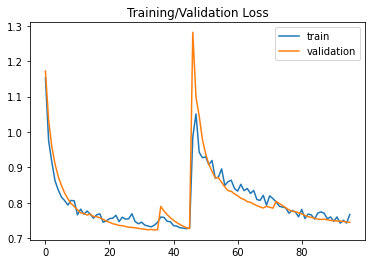

In [12]:
# Visualize the training and validation loss
plt.plot(classifier.history.history["loss"], label='train')
plt.plot(classifier.history.history['val_loss'], label='validation')
plt.legend()
#x1,y1 =plt.axis()
#plt.axis([0,0])
#plt.ylim([0.5, 0.7])
plt.title('Training/Validation Loss');
# Evaluate the model >> model.metrics_names
#print(f'{model.metrics_names}: {model.evaluate(Bitcoin_train, y_train , verbose=1)}')
plt.show()

# Save Accuracies

In [13]:
y_prob = classifier.predict(X_test)
y_pred = list(map(lambda x: 0 if x<0.5 else 1, y_prob))

In [14]:
# Computing Accuracy, Precision and Recall
accuracy = accuracy_score(y_test, y_pred)
print(accuracy)

0.4690181124880839


In [15]:
df_prediction = pd.read_csv("../data/model_accuracy_oil.csv", index_col = False)
df_prediction =  df_prediction.drop(columns=["Unnamed: 0"])


In [16]:
df_prediction["ANN_pred"] = y_pred
df_prediction["ANN_accuracy"] = [accuracy for x in range(len(y_pred))]
df_prediction["ANN_prob"] = y_prob

In [17]:
df_prediction

,ANN_pred,ANN_accuracy,ANN_prob
0,0,0.469018,0.404047
1,0,0.469018,0.342436
2,0,0.469018,0.339922
3,0,0.469018,0.404326
4,0,0.469018,0.361674
...,...,...,...
1044,0,0.469018,0.448135
1045,0,0.469018,0.448477
1046,0,0.469018,0.438599
1047,0,0.469018,0.417918


In [18]:
df_prediction.to_csv("../data/model_accuracy_oil.csv")